### 1. Two students each run PCA on the same dataset. The dataset has n=100 observations, with p=4 predictors.


    a. How many principal components (PCs) are there?
    
    3 PCs, due to subtrating the mean
    
    b. Do you expect that the two students will arrive at the same result (i.e. the same PC coefficients,
    scores and variances)?
    
    yes in practical 
    And No in math, because eigen matrix is not unique 
    
    c. Consider the scree plot (right). Based on this
    plot, how many PCs should you consider if you
    want to capture >60% of the total data
    variance?
    
    1
    
    d. How many PCs do you need to capture >80%

    2

### 2. Extra credit: Consider a dataset with n=100 observations and p=30 predictors. What is the minimum fraction of the total data variance captured by the first PC?

1/30

### 3. Two of your fellow students each run k-means clustering on the same dataset. They both choose k=4.


    a. (2 points) Do you expect that they will both come up with the same clustering? Why or why not?

    NO, 
    Because there may be different local minima, and different k-mean clusters will converge to a different result due to the local minima of sum of distance.

    b. (2 points) In your own words, define a local optimum and a global optimum of an objective function. Which of these two best describes the result of k-means clustering?
        
        Local optimum is at a concave point where neither moving forward nor backword will give a better result. So it is called the the best option locally.
        Global optimum is at the best concave point in the entire fucniton where none of the combination of clustering gives a better result.

    c. (1 point) Name one strategy the students could use to reduce the random variance in their cluster results.
    
      Apply brute force to find the global opt.
      

### Clustering 
    separate data into groups using similarity 

    similarity is measured by Eul distance 
        
    Local min: change assignment of clusters a "litte" the cost gose up

### K-Mean clusstering --> try to min cluster distance 
    1 pick some k  k=2
    2 randomly assign each point to a cluster
    3 compute centroid of each cluster 
    4 assign each point to the closest centroid (compute dist to each centroid)
        to calc centroid 
    5 go to 3 if cluster changes

### Q4  LSLR 3. In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

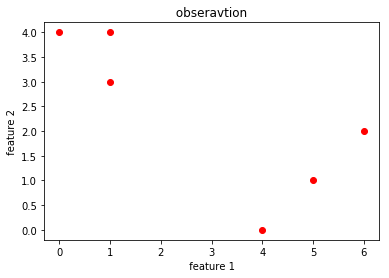

In [68]:
# (a) Plot the observations.
import matplotlib.pyplot as plt
import pandas as pd

d={1 :[1 ,4],2 :[1 ,3],3 :[0 ,4],4 :[5 ,1],5 :[6 ,2],6 :[4 ,0]}
df = pd.DataFrame(d,index=["X1","X2"]).T

plt.plot( df["X1"], df["X2"], 'ro')
plt.title(" obseravtion ")
plt.xlabel(" feature 1 ")
plt.ylabel(" feature 2 ")
plt.show()

In [69]:
def distance(v1,v2):
    d=0
    for pair in zip(v1,v2):
        d+=(pair[0]-pair[1])**2
    return d**0.5

In [70]:
def calc_centroid( df ):
    return [df.mean().X1, df.mean().X2]

In [80]:
def clusters():
    df1=pd.DataFrame(columns=["X1","X2"])
    df2=pd.DataFrame(columns=["X1","X2"])
   
    #iterate all data, calc distance 
    for i in df.index:
        datapoint = df.loc[i]
        d1=distance(centroid1,datapoint)
        d2=distance(centroid2,datapoint)
        if d1<d2:
            df1=df1.append(datapoint)
        else:
            df2=df2.append(datapoint)
            
    return df1,df2

In [94]:
def plot_centroid(df1,df2):
    
    centroid1 = calc_centroid(df1)
    centroid2 = calc_centroid(df2)

    plt.scatter(df1.X1,df1.X2,color="r")
    plt.scatter(df2.X1,df2.X2,color = "b")

    plt.text(centroid1[0],centroid1[1],"* centroid 1",color="r")
    plt.text(centroid2[0],centroid2[1],"* centroid 2",color="b")

    print "centroid1", centroid1
    print "centroid2", centroid2

    plt.show()

In [95]:
# b) Randomly assign a cluster label to each observation. You can use the sample()
# command in R to do this. Report the cluster labels for each observation

df1=df.sample(3)
df2=df.drop(df1.index)

print "\ncluster 1:\n",df1
print "\ncluster 1:\n",df2


cluster 1:
   X1  X2
4   5   1
1   1   4
6   4   0

cluster 1:
   X1  X2
2   1   3
3   0   4
5   6   2


centroid1 [3.3333333333333335, 1.6666666666666667]
centroid2 [2.3333333333333335, 3.0]


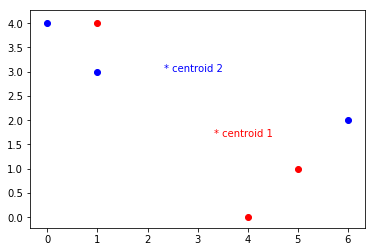

In [97]:
# c) Compute the centroid for each cluster.
plot_centroid(df1,df2)

centroid1 [0.6666666666666666, 3.6666666666666665]
centroid2 [5.0, 1.0]


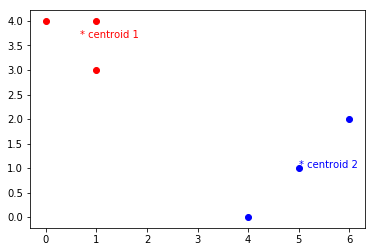

In [102]:
#(d) Assign each observation to the centroid to which it is closest, in
# terms of Euclidean distance. Report the cluster labels for each observation.
df1,df2 = clusters()
plot_centroid(df1,df2)

centroid1 [0.6666666666666666, 3.6666666666666665]
centroid2 [5.0, 1.0]


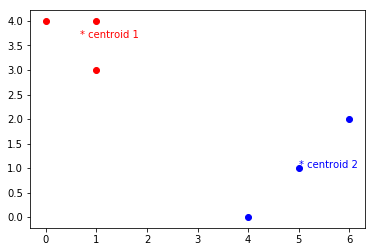

In [116]:
# (e) Repeat (c) and (d) until the answers obtained stop changing.

while(1):
    old_centroid1 = calc_centroid(df1)
    old_centroid2 = calc_centroid(df2)
    #re calc
    df1,df2 = clusters()
    new_centroid1 = calc_centroid(df1)
    new_centroid2 = calc_centroid(df2)

    if (old_centroid1[0] == new_centroid1[0] and old_centroid2[0] == new_centroid2[0]\
       and old_centroid1[1] == new_centroid1[1] and old_centroid2[1] == new_centroid2[1]):
        break
        
plot_centroid(df1,df2)

In [ ]:
#(f) In your plot from (a), color the observations according to the cluster labels obtained.


### 5. Hierarchical clustering. Using the same dataset as in problem ISLR 10.3 (6 observations, 2 predictors), perform hierarchical clustering.

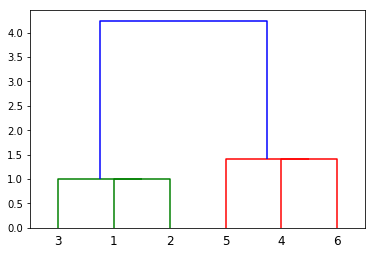

In [119]:
#a. (1 point) First use single-linkage clustering and plot the resulting dendrogram.

from scipy.cluster.hierarchy import dendrogram, linkage

single_linkage = linkage(df, 'single')
dn = dendrogram(single_linkage , labels=df.index)
plt.show()

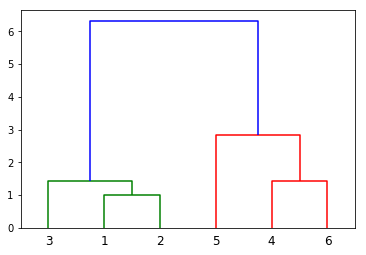

In [121]:
#b. (1 point) Plot the dendrogram using complete-linkage clustering.

complete_linkage = linkage(df, 'complete')
dn = dendrogram(complete_linkage , labels=df.index)
plt.show()

#### c. (2 points) Do these results generally agree with each other and with the results of k-means clustering? Why or why not?

    Yes
    Because both of them separate 123 and 456 to differnt clusters. 
    Also, they all cluster data by distance, and the distance between two clusteres is far.